In [4]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import helper

# To allow for inline rendering of plots.
%matplotlib inline

In [3]:
data, X_train, y_train, X_test, y_test, movies_data = helper.load_data('data/data.txt',
'data/train.txt', 'data/test.txt', 'data/movies.txt')

In [15]:
# Array stores total of user ratings and number of ratings
movie_ratings = np.zeros((len(movies_data), 2))

In [77]:
# Loop through data set
for d in data:
    # Add user's rating for corresponding movie
    movie_ratings[int(d[1] - 1)][0] += d[2]
    # Count of ratings per movie
    movie_ratings[int(d[1] - 1)][1] += 1

#All ratings of all movies
all_ratings = data[:,2]
movie_ratings.shape

(1682, 2)

In [94]:
'''
Given an input array of movie ratings and scalar n_max, return the indices in 
movie_ratings of the n_max movies with the most number of ratings.

Input:
    - movie_ratings: len(movies_data) array of data about n movies
    - n_max: desired n number of movies with certain attribute

Output:
    - max_positions: indices of n_max movies with most number of ratings

'''
def n_max_pos(movie_ratings, n_max):
    sorted_pos = np.argsort(rating_per_mov)
    max_positions = sorted_pos[-1*n_max:]
    return max_positions

In [95]:
rating_per_mov = movie_ratings[:,1]

most_ratings_pos = n_max_pos(rating_per_mov, 10)

most_ratings = movie_ratings[most_ratings_pos]

In [91]:
avgs = np.zeros(len(movies_data))
for i, m in enumerate(movie_ratings):
    all_ratings[i] = m[1]
    if m[1] != 0:
        avgs[i] = m[0] / m[1]

print(avgs)

[3.87831858 3.20610687 3.03333333 ... 2.         3.         3.        ]


In [100]:
n_max_pos(avgs, 10)

array([120, 299,   0, 287, 285, 293, 180,  99, 257,  49], dtype=int64)

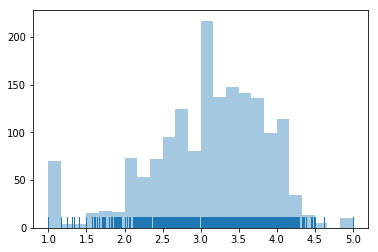

In [10]:
sns.distplot(avgs, kde=False, rug=True)

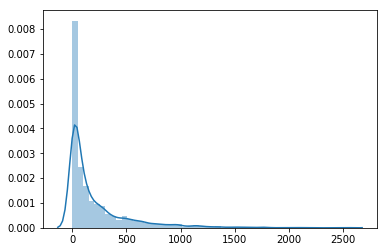

In [15]:
sns.distplot(movie_ratings[:,0])

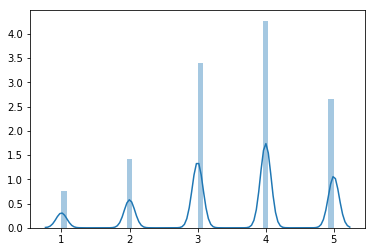

In [49]:
sns.distplot(all_ratings)

In [35]:
print(all_ratings.shape)

(100000,)


Text(0,0.5,'Number of Ratings')

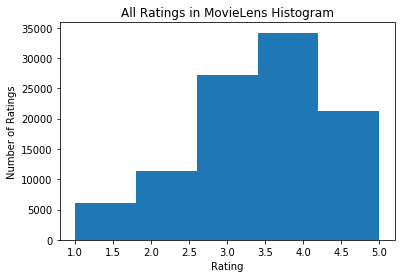

In [48]:
all_ratings_hist = plt.hist(all_ratings, bins = 5)
plt.title('All Ratings in MovieLens Histogram')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')

Text(0,0.5,'Proportional Number of Ratings')

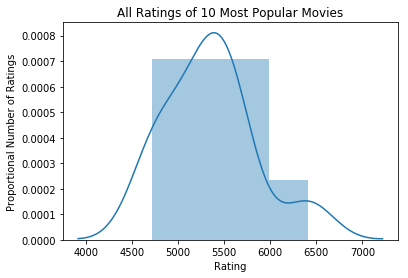

In [90]:
sns.distplot(most_ratings[:,1])
plt.title("All Ratings of 10 Most Popular Movies")
plt.xlabel("Rating")
plt.ylabel("Proportional Number of Ratings")